## ⏰ Time Series

In [1029]:
#Let's import libraries
import pandas as pd
import warnings as wg
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [1030]:
#Let's ignore all warnings
wg.filterwarnings("ignore")

In [1031]:
#Let's enter path and show data frame
path = 'time_series_covid19_deaths_global.csv'
df = pd.read_csv(path)
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,2427,2427,2427,2428,2428,2430,2430,2430,2432,2433
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1543,1555,1567,1582,1600,1617,1636,1653,1666,1681
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2935,2939,2943,2945,2947,2950,2954,2958,2961,2964
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,107,109
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,491,492,493,494,496,498,498,498,499,499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,1930,1933,1936,1942,1948,1956,1961,1971,1976,1986
270,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,616,617,617,618,618,618,618,618,619,619
271,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,940,951,959,974,983,991,1002,1016,1020,1031


In [1032]:
#Let's select only one Country/Region and correct dataframe
df = df[df['Country/Region'] == 'Albania']
df = pd.DataFrame(df.loc[1]) 
df1 = df.iloc[4:]
df1['Country/Region'] = 'Albania'

In [1033]:
#Let's rename column
df1 = df1.rename(columns = {1:'Death Value'})
df1.reset_index(inplace = True)
df1.rename(columns = {'index':'Date'}, inplace = True)

In [1034]:
#Let's convert dtype of Death Value
df1['Death Value'] = df1['Death Value'].astype('int')
df1 = df1[df1['Death Value'] != 0]

In [1035]:
#Let's reset index 
df1.reset_index(drop=True, inplace=True)

In [1036]:
#Let's look at claned new data 
df1

,Date,Death Value,Country/Region
0,3/11/20,1,Albania
1,3/12/20,1,Albania
2,3/13/20,1,Albania
3,3/14/20,1,Albania
4,3/15/20,1,Albania
...,...,...,...
344,2/18/21,1617,Albania
345,2/19/21,1636,Albania
346,2/20/21,1653,Albania
347,2/21/21,1666,Albania


Time Series

In [1037]:
#Let's create copy of df1 
time_ser = df1.drop(columns='Country/Region')

In [1038]:
#Let's create shift and rolling columns
for i in [1,5,7,15,30]:
    time_ser[f"Lag({i})"] = time_ser['Death Value'].shift(i)
for i in [1,5,7,15,30]:
    time_ser[f"MA({i})"] = time_ser['Death Value'].rolling(window = i).mean()

In [1039]:
#Let's look at correlations
time_ser.corr()['Death Value']

Death Value    1.000000
Lag(1)         0.999981
Lag(5)         0.999620
Lag(7)         0.999273
Lag(15)        0.996750
Lag(30)        0.988088
MA(1)          1.000000
MA(5)          0.999938
MA(7)          0.999866
MA(15)         0.999320
MA(30)         0.997346
Name: Death Value, dtype: float64

Time Series Mape

In [1040]:
#Let's find mape
time_ser_mape = time_ser.copy()
time_ser_mape.dropna(inplace = True)

In [1041]:
#Let's find mape by Lag(30)
time_ser_mape['Mape-Lag(30)'] = (time_ser_mape['Lag(30)'] - time_ser_mape['Death Value'])/time_ser_mape['Death Value'] 
time_ser_mape['Mape-Lag(5)'] = (time_ser_mape['Lag(5)'] - time_ser_mape['Death Value'])/time_ser_mape['Death Value'] 
time_ser_mape

,Date,Death Value,Lag(1),Lag(5),Lag(7),Lag(15),Lag(30),MA(1),MA(5),MA(7),MA(15),MA(30),Mape-Lag(30),Mape-Lag(5)
30,4/10/20,23,23.0,20.0,17.0,6.0,1.0,23.0,22.2,21.571429,16.866667,9.633333,-0.956522,-0.130435
31,4/11/20,23,23.0,21.0,20.0,8.0,1.0,23.0,22.6,22.000000,17.866667,10.366667,-0.956522,-0.086957
32,4/12/20,23,23.0,22.0,20.0,10.0,1.0,23.0,22.8,22.428571,18.733333,11.100000,-0.956522,-0.043478
33,4/13/20,23,23.0,22.0,21.0,10.0,1.0,23.0,23.0,22.714286,19.600000,11.833333,-0.956522,-0.043478
34,4/14/20,24,23.0,23.0,22.0,11.0,1.0,24.0,23.2,23.000000,20.466667,12.600000,-0.958333,-0.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2/18/21,1617,1600.0,1543.0,1517.0,1404.0,1287.0,1617.0,1584.2,1570.714286,1515.466667,1429.800000,-0.204082,-0.045764
345,2/19/21,1636,1617.0,1555.0,1531.0,1418.0,1291.0,1636.0,1600.4,1585.714286,1530.000000,1441.300000,-0.210880,-0.049511
346,2/20/21,1653,1636.0,1567.0,1543.0,1433.0,1296.0,1653.0,1617.6,1601.428571,1544.666667,1453.200000,-0.215971,-0.052027
347,2/21/21,1666,1653.0,1582.0,1555.0,1446.0,1303.0,1666.0,1634.4,1617.285714,1559.333333,1465.300000,-0.217887,-0.050420


Time Series Week

In [1042]:
#Let's find new features
time_ser_week = time_ser[['Date','Death Value']]
time_ser_week.reset_index(inplace= True)

In [1043]:
time_ser_week['Week'] = time_ser_week['index']%7

In [1044]:
#Let's create month column
time_ser_week['Date'] = pd.to_datetime(time_ser_week['Date'])
time_ser_week['Month'] = time_ser_week['Date'].dt.month

In [1045]:
# #Let's find trend
# def linreg(X, Y):
#     N = len(X)
#     Sx = Sy = Sxx = Syy = Sxy = 0.0
#     for x, y in zip(X, Y):
#         Sx = Sx + x
#         Sy = Sy + y
#         Sxx = Sxx + x*x
#         Syy = Syy + y*y
#         Sxy = Sxy + x*y
#     det = Sxx * N - Sx * Sx
#     return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det

In [1046]:
# #Let's find m and n 
# value = time_ser_week['Death Value']
# m,n = linreg(range(len(time_ser_week)),value)

In [1047]:
y = time_ser_week['Death Value']
x = range(len(time_ser_week))

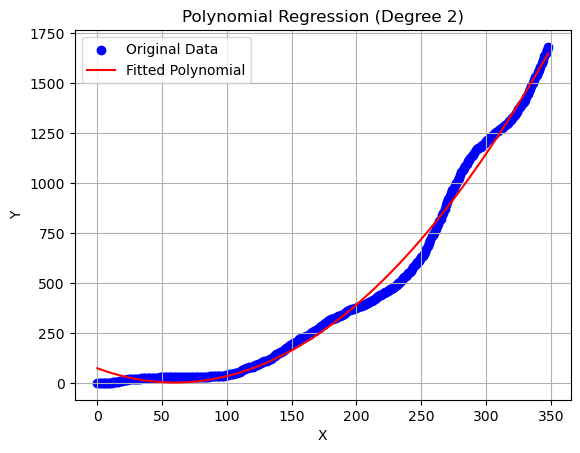

In [1048]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Given data points
X_data = np.array(x).reshape(-1, 1)
Y_data = y  # Note: There seems to be an extra data point (9) in Y, so I'm assuming it's a typo.

# Fit a polynomial regression of degree 2
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_data)

# Use LinearRegression to fit the polynomial features
model = LinearRegression()
model.fit(X_poly, Y_data)

# Generate points for the fitted polynomial curve
X_curve = np.linspace(min(X_data), max(X_data), 100).reshape(-1, 1)
X_curve_poly = poly_features.transform(X_curve)
Y_curve = model.predict(X_curve_poly)

# Plot the original data and the fitted polynomial curve
import matplotlib.pyplot as plt

plt.scatter(X_data, Y_data, label="Original Data", color="blue")
plt.plot(X_curve, Y_curve, label="Fitted Polynomial", color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title(f"Polynomial Regression (Degree {degree})")
plt.grid(True)
plt.show()

In [1049]:
c = model.coef_
i = model.intercept_

In [1050]:
time_ser_week['Trend'] = c[2]*time_ser_week['index']**2 + c[1]*time_ser_week['index'] + i

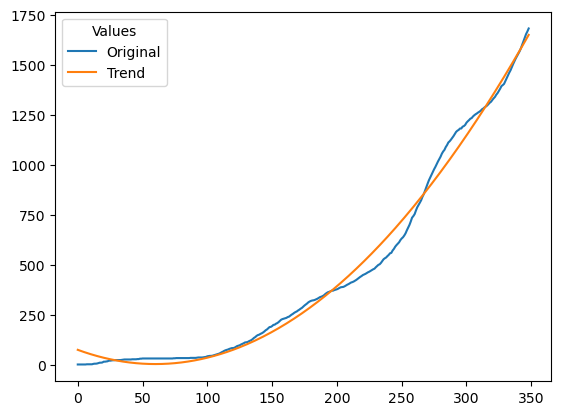

In [1051]:
#Let's look at as visually
plt.plot(time_ser_week['Death Value'], label = 'Original')
plt.plot(time_ser_week['Trend'] , label = 'Trend')
plt.legend(title = 'Values')

In [1052]:
time_ser_week

,index,Date,Death Value,Week,Month,Trend
0,0,2020-03-11,1,0,3,74.242931
1,1,2020-03-12,1,1,3,71.887535
2,2,2020-03-13,1,2,3,69.571795
3,3,2020-03-14,1,3,3,67.295710
4,4,2020-03-15,1,4,3,65.059282
...,...,...,...,...,...,...
344,344,2021-02-18,1617,1,2,1603.517650
345,345,2021-02-19,1636,2,2,1614.803833
346,346,2021-02-20,1653,3,2,1626.129673
347,347,2021-02-21,1666,4,2,1637.495168


In [1053]:
#Let's create detrend column
time_ser_week['Detrend'] = time_ser_week['Death Value'] - time_ser_week['Trend'] 
time_ser_week

,index,Date,Death Value,Week,Month,Trend,Detrend
0,0,2020-03-11,1,0,3,74.242931,-73.242931
1,1,2020-03-12,1,1,3,71.887535,-70.887535
2,2,2020-03-13,1,2,3,69.571795,-68.571795
3,3,2020-03-14,1,3,3,67.295710,-66.295710
4,4,2020-03-15,1,4,3,65.059282,-64.059282
...,...,...,...,...,...,...,...
344,344,2021-02-18,1617,1,2,1603.517650,13.482350
345,345,2021-02-19,1636,2,2,1614.803833,21.196167
346,346,2021-02-20,1653,3,2,1626.129673,26.870327
347,347,2021-02-21,1666,4,2,1637.495168,28.504832


In [1054]:
#Let's create weekly and monthly dict and find average detrend value
weekly = {} 
for g in time_ser_week.groupby(by = 'Week'):
    weekly[g[0]] = g[1]['Detrend'].mean()   
monthly = {}
for g in time_ser_week.groupby(by = 'Month'):
    monthly[g[0]] = g[1]['Detrend'].mean()

In [1055]:
#Let's add weekly average column to data frame
time_ser_week['Weekly Average'] = time_ser_week['Week'].map(weekly)
time_ser_week['Monthly Average'] = time_ser_week['Month'].map(monthly)

Time Series All

In [1056]:
#Let's create time_ser_all dataframe
time_ser_all = time_ser_week.copy()

In [1057]:
#Let's find shift and rolling parameters
for i in [1,7,31]:
    time_ser_all[f"{i}-shift"] = time_ser_all['Detrend'].shift(i)
for i in [7,30]:
    time_ser_all[f"{i}MA"] =  time_ser_all['Detrend'].rolling(window = i).mean()

In [1058]:
#Let's remove unuseful columns and null values
time_ser_csv = time_ser_all.drop(['index','Week','Month'],axis = 1)
time_ser_csv.dropna(inplace = True)

In [1059]:
#Let's convert dataframe to csv 
time_ser_csv.to_csv('time_series.csv')

In [1060]:
#Let's determine X and y
X = time_ser_csv.drop(['Death Value','Date'] , axis = 1)
y = time_ser_csv['Death Value']

In [1061]:
#And let's establish linear model
lr = LinearRegression() 
lr.fit(X,y)

LinearRegression()

# Add Holidays

In [1062]:
time_ser_csv

,Date,Death Value,Trend,Detrend,Weekly Average,Monthly Average,1-shift,7-shift,31-shift,7MA,30MA
31,2020-04-11,23,19.665581,3.334419,0.181183,7.870662,2.168695,-8.658416,-73.242931,-1.361030,-31.568649
32,2020-04-12,23,18.539514,4.460486,0.476649,7.870662,3.334419,-7.254758,-70.887535,0.312576,-29.134239
33,2020-04-13,23,17.453102,5.546898,0.832460,7.870662,4.460486,-4.890756,-68.571795,1.803670,-26.739486
34,2020-04-14,24,16.406346,7.593654,0.607671,7.870662,5.546898,-2.566409,-66.295710,3.255107,-24.351054
35,2020-04-15,25,15.399246,9.600754,-0.983152,7.870662,7.593654,-1.281719,-64.059282,4.809746,-21.968946
...,...,...,...,...,...,...,...,...,...,...,...
344,2021-02-18,1617,1603.517650,13.482350,-0.708718,-6.331227,7.728879,-8.624724,7.684795,0.737942,-16.009738
345,2021-02-19,1636,1614.803833,21.196167,-0.393940,-6.331227,13.482350,-5.633317,3.627939,4.570725,-15.220913
346,2021-02-20,1653,1626.129673,26.870327,0.181183,-6.331227,21.196167,-4.681567,-2.468572,9.078138,-14.071744
347,2021-02-21,1666,1637.495168,28.504832,0.476649,-6.331227,26.870327,-3.769472,-7.604739,13.688753,-12.762231


In [1063]:
time_ser_csv.corr()['Detrend']

Death Value        0.017839
Trend             -0.070934
Detrend            1.000000
Weekly Average     0.005612
Monthly Average    0.892587
1-shift            0.997581
7-shift            0.918163
31-shift          -0.010681
7MA                0.983946
30MA               0.709039
Name: Detrend, dtype: float64

In [1064]:
Trend = time_ser_csv['Trend']
Date = time_ser_csv['Date']

In [1065]:
import json
# trend_info = {'Coef_':c, 'Inter_':i, 'last': len(time_ser_csv), 
#               'maxdate': str(time_ser_csv['Date'].max()), 
#               'mindate': str(time_ser_csv['Date'].min()) }


trend_info = {
    'Coef_': c.tolist() if isinstance(c, np.ndarray) else c,
    'Inter_': i.tolist() if isinstance(i, np.ndarray) else i,
    'last': len(time_ser_csv),
    'maxdate': str(time_ser_csv['Date'].max()),
    'mindate': str(time_ser_csv['Date'].min())
}

# Define the filename for the JSON file
filename = 'trendinfo.json'

# Save the trend_info dictionary to a JSON file
with open(filename, 'w') as json_file:
    json.dump(trend_info, json_file, indent=4)
    

In [1066]:
time_ser_csv.drop(columns = ['Weekly Average','31-shift','Death Value','Date'] , inplace = True)

In [1067]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [1068]:
#Let's determine X and y
X = time_ser_csv.drop(['Detrend'] , axis = 1)
y = time_ser_csv['Detrend']

In [1069]:
X_train,X_test,y_train , y_test = train_test_split(X,y , random_state = 42, test_size = 0.2)

In [1070]:
regr = RandomForestRegressor(n_estimators=100, max_depth = 5 ,random_state=42)
regr = regr.fit(X_train,y_train)
regr.score(X_test,y_test)

0.9906939025245479

In [1071]:
time_ser_csv.drop('Monthly Average',axis = 1,inplace = True)

In [1072]:
time_ser_csv

,Trend,Detrend,1-shift,7-shift,7MA,30MA
31,19.665581,3.334419,2.168695,-8.658416,-1.361030,-31.568649
32,18.539514,4.460486,3.334419,-7.254758,0.312576,-29.134239
33,17.453102,5.546898,4.460486,-4.890756,1.803670,-26.739486
34,16.406346,7.593654,5.546898,-2.566409,3.255107,-24.351054
35,15.399246,9.600754,7.593654,-1.281719,4.809746,-21.968946
...,...,...,...,...,...,...
344,1603.517650,13.482350,7.728879,-8.624724,0.737942,-16.009738
345,1614.803833,21.196167,13.482350,-5.633317,4.570725,-15.220913
346,1626.129673,26.870327,21.196167,-4.681567,9.078138,-14.071744
347,1637.495168,28.504832,26.870327,-3.769472,13.688753,-12.762231


In [1073]:
#Let's determine X and y
X = time_ser_csv.drop(['Detrend'] , axis = 1)
y = time_ser_csv['Detrend']

In [1074]:
X_train , X_test , y_train , y_test = train_test_split(X,y , random_state = 42, test_size = 0.2)

In [1075]:
X_train

,Trend,1-shift,7-shift,7MA,30MA
240,646.274955,-96.152625,-95.251419,-94.534816,-76.334589
107,47.103348,3.744766,7.000680,4.385573,11.827561
125,87.150535,10.411382,10.950118,9.622653,7.430525
252,734.836058,-90.237859,-92.481439,-90.525455,-90.462257
341,1569.897033,-3.769472,-20.836878,-7.569772,-15.914146
...,...,...,...,...,...
219,505.033743,-59.744185,-48.839603,-57.077632,-26.835221
102,38.259335,6.390500,8.456741,6.349035,15.296531
137,120.986696,16.051091,11.445040,12.642671,10.261133
301,1155.726089,63.815241,84.230454,68.556767,75.523126


In [1076]:
regr = RandomForestRegressor(n_estimators=100, max_depth = 5 ,random_state=42)
regr = regr.fit(X_train,y_train)
regr.score(X_test,y_test)

0.9907763943152296

In [1077]:
predict = np.array([[1155.726089,63.815241,84.230454,68.556767 ,75.523126]])
print('Predict: ', regr.predict(predict))

Predict:  [62.64355045]


### Save Model

In [1078]:
import pickle

In [1079]:
model = open('Model.pickle','wb')
pickle.dump(regr,model)
model.close()

In [1080]:
#time_ser_csv['Date'] = Date

In [1081]:
Trend.to_csv("TREND.csv")
time_ser_csv.to_csv('timeserall.csv')

### Let's create function dynamic

In [1082]:
time_ser_csv.reset_index(drop = True , inplace = True)

In [1083]:
def predict():
    X = time_ser_csv.drop(['Detrend'], axis=1)
    y = time_ser_csv['Detrend']
    regr.fit(X, y)
    trend = c[2] * len(time_ser_csv)**2 + c[1] * len(time_ser_csv) + i
    a = regr.predict([[trend,
                       time_ser_csv['1-shift'].iloc[len(time_ser_csv) - 1],
                       time_ser_csv['7-shift'].iloc[len(time_ser_csv) - 1],
                       time_ser_csv['7MA'].iloc[len(time_ser_csv) - 1],
                       time_ser_csv['30MA'].iloc[len(time_ser_csv) - 1]]])
    
    new_row = {
        'Trend': trend,
        'Detrend': a[0],
        '1-shift': time_ser_csv['Detrend'].iloc[len(time_ser_csv) - 1],
        '7-shift': time_ser_csv['Detrend'].iloc[len(time_ser_csv) - 7],
        '7MA': time_ser_csv['Detrend'].rolling(window = 7).mean().iloc[-1],
        '30MA': time_ser_csv['Detrend'].rolling(window = 30).mean().iloc[-1]
    }
    
    time_ser_csv.loc[len(time_ser_csv)] = new_row
    return time_ser_csv[['Detrend','Trend']].iloc[-1].sum()


In [1084]:
day = int(input("Enter number: "))
for i in range(day):
    print(f"{i+1} day: ",predict())

Enter number: 2
1 day:  1279.222494624477
2 day:  1290.4532716559513


In [1085]:
len(time_ser_csv)

320

In [1086]:
time_ser_csv

,Trend,Detrend,1-shift,7-shift,7MA,30MA
0,19.665581,3.334419,2.168695,-8.658416,-1.361030,-31.568649
1,18.539514,4.460486,3.334419,-7.254758,0.312576,-29.134239
2,17.453102,5.546898,4.460486,-4.890756,1.803670,-26.739486
3,16.406346,7.593654,5.546898,-2.566409,3.255107,-24.351054
4,15.399246,9.600754,7.593654,-1.281719,4.809746,-21.968946
...,...,...,...,...,...,...
315,1626.129673,26.870327,21.196167,-4.681567,9.078138,-14.071744
316,1637.495168,28.504832,26.870327,-3.769472,13.688753,-12.762231
317,1648.900319,32.099681,28.504832,-2.897033,18.688284,-11.225707
318,1249.753109,29.469386,32.099681,0.935751,18.688284,-11.225707


### Retraining Model

In [856]:
def predict():
    y = time_ser_week['Trend'] + time_ser_week['Detrend']
    x = range(len(time_ser_week))
    X_data = np.array(x).reshape(-1, 1)
    Y_data = y  # Note: There seems to be an extra data point (9) in Y, so I'm assuming it's a typo.
    # Fit a polynomial regression of degree 2
    degree = 2
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_data)

    # Use LinearRegression to fit the polynomial features
    model = LinearRegression()
    model.fit(X_poly, Y_data)
    
    c = model.coef_
    i = model.intercept_
    
    
    X = time_ser_csv.drop(['Detrend'], axis=1)
    y = time_ser_csv['Detrend']
    regr.fit(X, y)
    trend = c[2] * len(time_ser_csv)**2 + c[1] * len(time_ser_csv) + i
    a = regr.predict([[trend,
                       time_ser_csv['1-shift'].iloc[len(time_ser_csv) - 1],
                       time_ser_csv['7-shift'].iloc[len(time_ser_csv) - 1],
                       time_ser_csv['7MA'].iloc[len(time_ser_csv) - 1],
                       time_ser_csv['30MA'].iloc[len(time_ser_csv) - 1]]])
    
    new_row = {
        'Trend': trend,
        'Detrend': a[0],
        '1-shift': time_ser_csv['Detrend'].iloc[len(time_ser_csv) - 1],
        '7-shift': time_ser_csv['Detrend'].iloc[len(time_ser_csv) - 7],
        '7MA': time_ser_csv['Detrend'].rolling(window = 7).mean().iloc[-1],
        '30MA': time_ser_csv['Detrend'].rolling(window = 30).mean().iloc[-1]
    }
    
    time_ser_csv.loc[len(time_ser_csv)] = new_row
    return time_ser_csv[['Detrend','Trend']].iloc[-1].sum()

In [858]:
day = int(input("Enter number: "))
for i in range(day):
    print(f"{i+1} day: ",predict())

Enter number: 2
1 day:  1394.4528757024502
2 day:  1404.804768804988


In [846]:
len(time_ser_csv)

320

In [847]:
time_ser_csv

,Trend,Detrend,1-shift,7-shift,7MA,30MA
0,19.665581,3.334419,2.168695,-8.658416,-1.361030,-31.568649
1,18.539514,4.460486,3.334419,-7.254758,0.312576,-29.134239
2,17.453102,5.546898,4.460486,-4.890756,1.803670,-26.739486
3,16.406346,7.593654,5.546898,-2.566409,3.255107,-24.351054
4,15.399246,9.600754,7.593654,-1.281719,4.809746,-21.968946
...,...,...,...,...,...,...
315,1626.129673,26.870327,21.196167,-4.681567,9.078138,-14.071744
316,1637.495168,28.504832,26.870327,-3.769472,13.688753,-12.762231
317,1648.900319,32.099681,28.504832,-2.897033,18.688284,-11.225707
318,1323.996040,29.469386,32.099681,0.935751,18.688284,-11.225707


## 📍 The End